In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [29]:

# Read the data
data = pd.read_csv('spotify_data.csv')
data.shape

(169909, 19)

# Introduction
## Every industry is currently interested in research on the topic of being able to anticipate what will be popular in the future. It has also recently become a very essential subject for the rapidly increasing and competitive music industry. Because of the widespread usage of digital music platforms (Spotify, Billboard, and Lastfm), data can be quickly obtained and users' listening habits may be easily observed. This is useful in predicting approaches and is also commonly used in recommendation systems.

In [30]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


Feature Explanations: 
Dataset contains 169909 songs and has 15 features like duration ms, key, mode, acousticness, danceability, energy and so on .
duration_ms: The duration of the track in milliseconds.
key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
popularity: Song ratings of spotify audience.
liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

In [31]:
#convert types to float
data['duration_ms'] = data['duration_ms'].astype(float)
data['mode'] = data['mode'].astype(float)


In [32]:
data["new_popularity"]= [ 1 if i>=66.5 else 0 for i in data.popularity ]
data["new_popularity"].value_counts()

0    162612
1      7297
Name: new_popularity, dtype: int64

In [33]:
pop = data[data["new_popularity"] == 1]
pop.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,new_popularity
count,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.0
mean,0.248213,0.635226,217523.299712,0.627288,0.308209,0.040169,5.192545,0.178443,-7.272764,0.636426,72.040291,0.101923,120.671469,0.500956,2010.801836,1.0
std,0.265867,0.167081,54806.874777,0.201137,0.461785,0.167650,3.584400,0.141956,4.291995,0.481061,4.741887,0.102930,30.394175,0.239226,13.228049,0.0
min,0.000000,0.000000,37640.000000,0.000020,0.000000,0.000000,0.000000,0.000000,-54.376000,0.000000,67.000000,0.000000,0.000000,0.000000,1956.000000,1.0
25%,0.034600,0.538000,185093.000000,0.505000,0.000000,0.000000,2.000000,0.094100,-8.372000,0.000000,68.000000,0.037300,97.387000,0.322000,2008.000000,1.0
50%,0.146000,0.654000,211666.000000,0.649000,0.000000,0.000000,5.000000,0.121000,-6.319000,1.000000,71.000000,0.056800,119.958000,0.497000,2017.000000,1.0
75%,0.384000,0.754000,241371.000000,0.777000,1.000000,0.000151,8.000000,0.215000,-4.821000,1.000000,74.000000,0.121000,140.053000,0.687000,2019.000000,1.0
max,0.996000,0.979000,713192.000000,1.000000,1.000000,1.000000,11.000000,0.965000,0.175000,1.000000,100.000000,0.903000,220.099000,0.985000,2020.000000,1.0


In [34]:
data.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,new_popularity
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550,-0.137801
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430,0.117278
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293,-0.024240
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419,0.109878
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227,0.169774
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571,-0.083390
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503,-0.000481
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839,-0.033845
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118,0.153173
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084,-0.033624


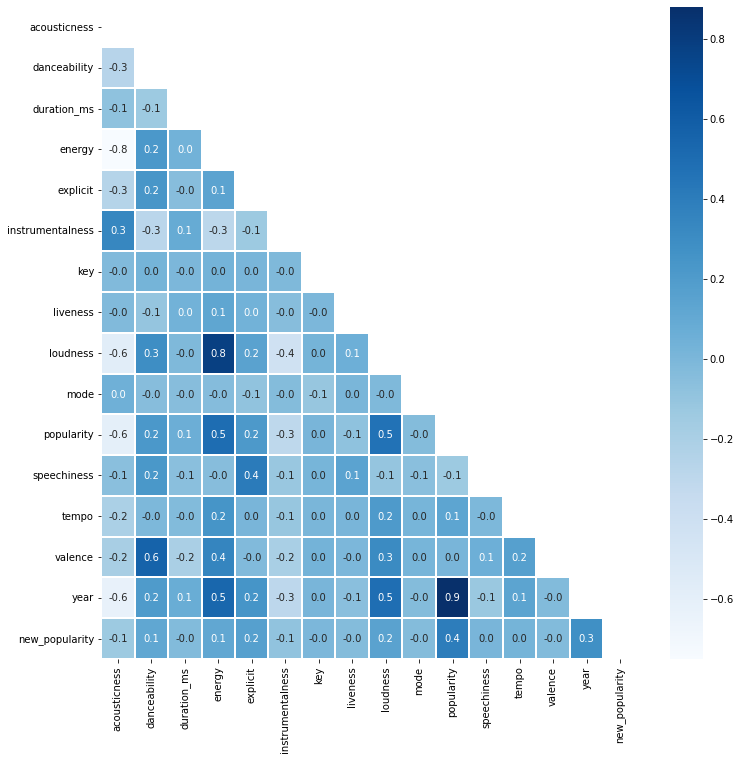

In [35]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

In [36]:
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [37]:
data.loc[detect_outliers(data,2,["duration_ms","popularity","acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"])]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,new_popularity
474,0.898,"['Jean Sibelius', 'Arturo Toscanini']",0.131,732120.0,0.278000,0,4rc5a3SkG6cuGBw713j1l3,0.926000,2,0.7220,-12.556,1.0,"Symphony No. 2 in D Major, Op. 43: IV. Finale....",0,1942,0.0373,58.118,0.1620,1942,0
629,0.739,['Jazz At The Philharmonic'],0.551,717973.0,0.579000,0,2uLY7JyfLtgB85NqYKAGWY,0.699000,9,0.6860,-13.028,0.0,"Oh, Lady, Be Good",0,1945-01-01,0.1730,124.655,0.5310,1945,0
681,0.985,"['George Frideric Handel', 'The Liverpool Phil...",0.392,25400.0,0.047100,0,4tGCIEdzCs6qsEqpY5PFWE,0.000340,9,0.6480,-26.801,1.0,"Messiah, HWV 56, Pt. 1: Behold a virgin shall ...",0,1946,0.0848,145.021,0.3840,1946,0
833,0.976,"['Wolfgang Amadeus Mozart', 'George Szell', 'C...",0.104,452093.0,0.034700,0,5FEo8XGhuXFKQcBQ2vFNxM,0.933000,5,0.0778,-26.430,1.0,"Symphony No. 41 in C Major, K. 551 ""Jupiter"": ...",0,1947,0.0411,85.494,0.0533,1947,0
943,0.940,"['Igor Stravinsky', 'Columbia Symphony Orchest...",0.182,25200.0,0.000884,0,4HYlFKmAWrhjC4PBXyJmHS,0.993000,10,0.0820,-48.278,1.0,"Le sacre du printemps: Part 1 ""Adoration of th...",0,1948,0.0604,118.462,0.0000,1948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155575,0.860,['Ella Fitzgerald'],0.498,245360.0,0.451000,0,4UzPsb7OSLzWMnMpSpelRK,0.000000,8,0.7040,-6.534,1.0,(You'll Have To Swing It) Mr. Paganini - Live ...,16,1961,0.3070,199.240,0.5850,1961,0
156018,0.594,['Bob Dylan'],0.147,289893.0,0.961000,0,2PWkWinrk3AsQCA7Ls6FPs,0.000018,9,0.9360,-4.868,1.0,"Tell Me, Momma - Live at Free Trade Hall, Manc...",25,1966-06-21,0.2770,201.795,0.1720,1966,0
156527,0.230,['Jimi Hendrix'],0.399,277347.0,0.432000,0,065DgHzdiTnwiwEEBHFrIN,0.000000,7,0.7970,-16.663,1.0,My Friend,32,1971,0.3040,204.671,0.6500,1971,0
164927,0.151,['Marvin Gaye'],0.349,247840.0,0.764000,0,6BpCAee9NTICafDv21ErYZ,0.000635,1,0.7360,-9.837,0.0,What's Going On - Detroit Mix,32,1971-05-21,0.2120,204.916,0.8220,1971,0


In [38]:
# drop outliers
data = data.drop(detect_outliers(data,2,["duration_ms","popularity","acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"]),axis = 0).reset_index(drop=True)

In [39]:
data[data["mode"].isnull()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,new_popularity


C:\Users\josht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


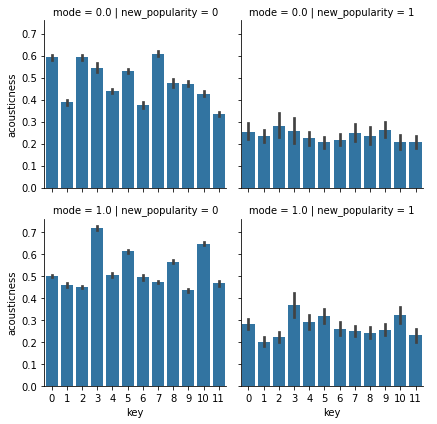

In [40]:
g = sns.FacetGrid(data, row = "mode", col = "new_popularity")
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

C:\Users\josht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


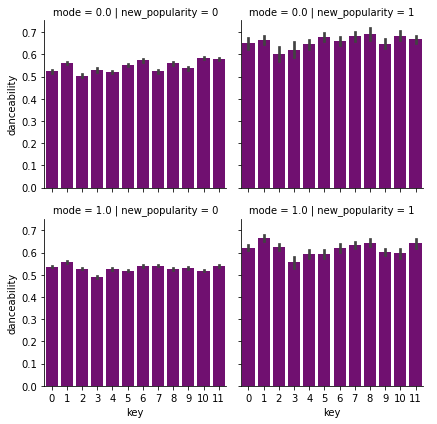

In [41]:
g = sns.FacetGrid(data, row = "mode", col = "new_popularity")
g.map(sns.barplot, "key", "danceability",color="purple")
g.add_legend()
plt.show()

C:\Users\josht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


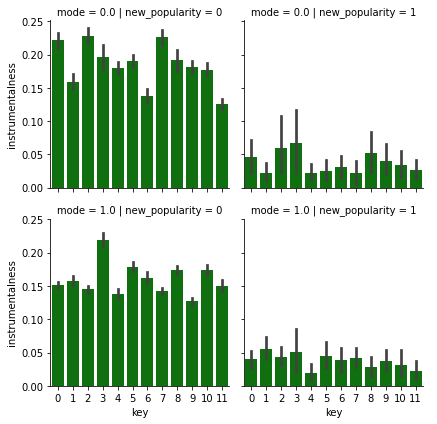

In [42]:
g = sns.FacetGrid(data, row = "mode", col = "new_popularity")
g.map(sns.barplot, "key", "instrumentalness",color="green")
g.add_legend()
plt.show()

C:\Users\josht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


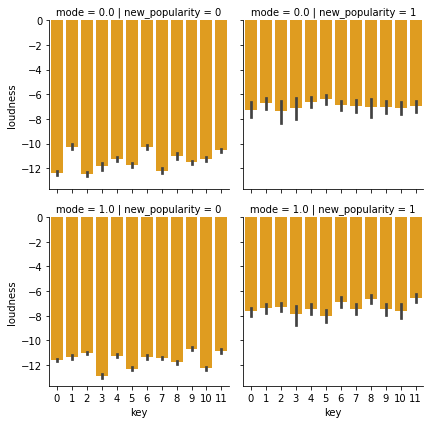

In [43]:
g = sns.FacetGrid(data, row = "mode", col = "new_popularity")
g.map(sns.barplot, "key", "loudness",color="orange")
g.add_legend()
plt.show()

## Feature Distribution

C:\Users\josht\AppData\Local\Temp\ipykernel_2556\1059387460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data["duration_ms"] , color="teal", ax=axes[0, 0])
C:\Users\josht\AppData\Local\Temp\ipykernel_2556\1059387460.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data["instrumentaln

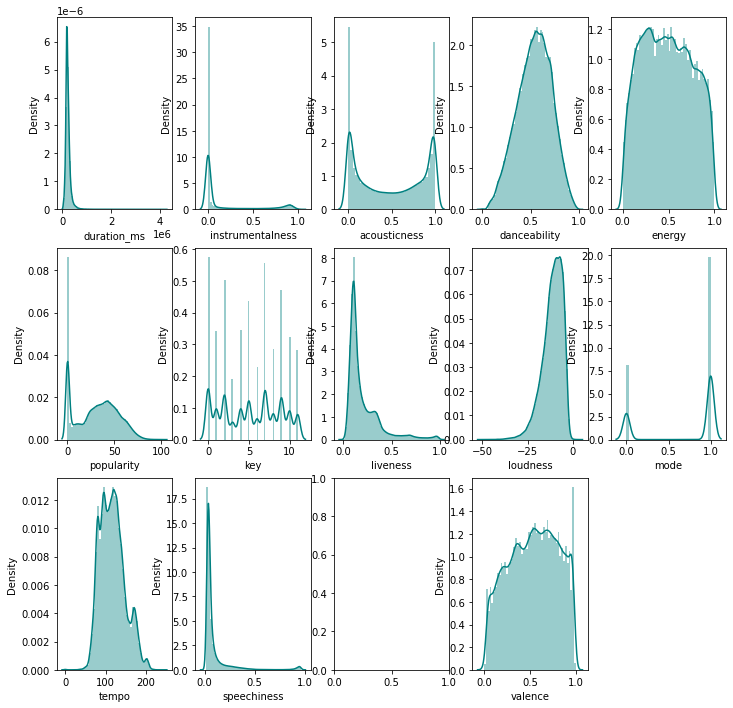

In [44]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( data["duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( data["popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( data["mode"] , color="teal", ax=axes[1, 4])
sns.distplot( data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( data["valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

C:\Users\josht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\josht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide t

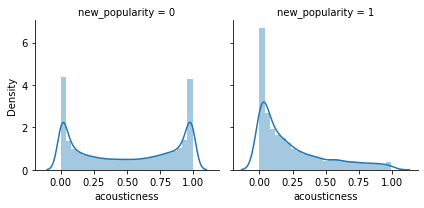

In [45]:
g = sns.FacetGrid(data, col = "new_popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

C:\Users\josht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\josht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide t

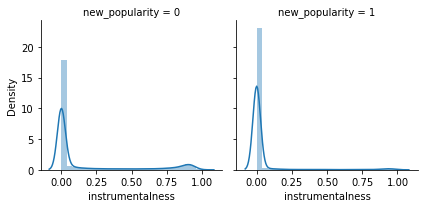

In [46]:
g = sns.FacetGrid(data, col = "new_popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

- Data Destribution of songs today display features like dancebility, loudness, energy whereas previous generations had more of instrumentalness and acousticness.
- According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.
- Some of the keys more effective in song as compared to the other keys (0,2,5,7,9) and that also relates to its popularity.

In [47]:
song_data3=data.copy()
song_data3["song_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in data.valence ]
song_data3["song_valence"].value_counts()

Happy    93802
Sad      74496
Name: song_valence, dtype: int64

In [48]:

song_data1=song_data3[song_data3["popularity"]>66.5]
song_data1["song_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data1.valence ]
song_data1["song_valence"].value_counts()

C:\Users\josht\AppData\Local\Temp\ipykernel_2556\1753158343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data1["song_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data1.valence ]


Sad      3640
Happy    3621
Name: song_valence, dtype: int64

In [49]:
song_data2_new=song_data1[song_data1["popularity"]>90]
song_data2_new["song_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data2_new.valence ]
song_data2_new["song_valence"].value_counts()

C:\Users\josht\AppData\Local\Temp\ipykernel_2556\2159391540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_data2_new["song_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data2_new.valence ]


Happy    19
Sad      16
Name: song_valence, dtype: int64

## People like Happy Songs or Sad Songs?
## As we see in the feature explanations, audio valance describes the musical positiveness conveyed by a track (like sad or happiness - between 0 to 1). We supposed our threshold is 0.5. With this threshold we have happy songs more in the general data and the numbers are pretty close in the popular songs, but when we looked at top 500, we can say that negative songs are twice as much as positives.

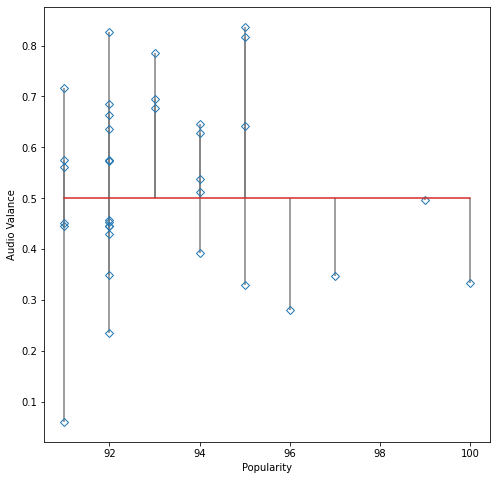

In [50]:
song_data2= song_data2_new[song_data2_new.new_popularity==1]
a=song_data2.iloc[:,13]
a.to_numpy()
b=song_data2.iloc[:,17]
b.to_numpy()
plt.figure(figsize=[8,8])
markerline, stemlines, baseline = plt.stem(
    a, b, linefmt='grey', markerfmt='D', bottom=0.5)
markerline.set_markerfacecolor('none')
plt.xlabel("Popularity")
plt.ylabel("Audio Valance")
plt.show()

In [51]:
data["new_popularity"]= [ 1 if i>=66.5 else 0 for i in data.popularity ]
data["new_popularity"].value_counts()

0    161037
1      7261
Name: new_popularity, dtype: int64

In [52]:
data_plr = pd.concat([data.popularity,data.name],axis=1)
data_plr.head()

,popularity,name
0,0,Singende Bataillone 1. Teil
1,0,"Fantasiestücke, Op. 111: Più tosto lento"
2,0,Chapter 1.18 - Zamek kaniowski
3,0,Bebamos Juntos - Instrumental (Remasterizado)
4,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61"


In [53]:
data['name'].value_counts(dropna=False)
data['name'].dropna(inplace=True)

In [54]:
import re
import nltk 
import nltk as nlp

nltk.download("stopwords") 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
Song_Name = [ word for word in data.name if not word in set(stopwords.words("english"))]
lemma = nlp.WordNetLemmatizer()
Song_Name = [ lemma.lemmatize(word) for word in Song_Name] 

In [56]:
#Sentiment Analysis
from textblob import TextBlob
data_plr['sentiment'] = data_plr['name'].map(lambda text: TextBlob(text).sentiment.polarity)


In [57]:
data_plr.head()

,popularity,name,sentiment
0,0,Singende Bataillone 1. Teil,0.0000
1,0,"Fantasiestücke, Op. 111: Più tosto lento",0.0000
2,0,Chapter 1.18 - Zamek kaniowski,0.0000
3,0,Bebamos Juntos - Instrumental (Remasterizado),0.0000
4,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.0625


In [58]:
cut = pd.cut(
    data_plr['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
data_plr['polarity'] = cut.values
data_plr[['polarity','sentiment']].head()

,polarity,sentiment
0,neutral,0.0000
1,neutral,0.0000
2,neutral,0.0000
3,neutral,0.0000
4,positive,0.0625


In [59]:
data.drop(["popularity","name"],axis=1,inplace=True)

In [60]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [61]:
def change_type(var):
    data[var] = data[var].astype(int)

In [62]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,new_popularity
count,168298.000000,168298.000000,1.682980e+05,168298.000000,168298.000000,168298.000000,168298.000000,168298.000000,168298.000000,168298.000000,168298.000000,168298.000000,168298.000000,168298.000000,168298.000000
mean,0.491553,0.539838,2.293146e+05,0.489627,0.085307,0.158077,5.200169,0.203651,-11.299440,0.708927,0.093186,117.029110,0.534039,1977.320152,0.043144
std,0.376269,0.174203,1.132735e+05,0.266514,0.279339,0.306334,3.514849,0.172208,5.564146,0.454258,0.148600,30.473959,0.261452,25.582460,0.203181
min,0.000000,0.000000,1.530700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-51.123000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.000000
25%,0.093500,0.419000,1.710000e+05,0.265000,0.000000,0.000000,2.000000,0.098200,-14.401000,0.000000,0.034900,93.664000,0.325000,1957.000000,0.000000
50%,0.488000,0.549000,2.082670e+05,0.482000,0.000000,0.000189,5.000000,0.135000,-10.438000,1.000000,0.044900,114.851000,0.546000,1978.000000,0.000000
75%,0.885000,0.668000,2.618670e+05,0.710000,0.000000,0.076100,8.000000,0.259000,-7.100000,1.000000,0.074800,135.713000,0.751000,1999.000000,0.000000
max,0.996000,0.988000,4.270034e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,0.969000,244.091000,1.000000,2020.000000,1.000000


In [63]:
song_data =pd.concat([data,data_plr.sentiment],axis=1)
song_data.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,new_popularity,sentiment
0,0.995,['Carl Woitschach'],0.708,158648.0,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1.0,1928,0.0506,118.469,0.7790,1928,0,0.0
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1.0,1928,0.0462,83.972,0.0767,1928,0,0.0
2,0.604,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0.0,1928,0.9290,107.177,0.8800,1928,0,0.0


In [64]:
data["key"] = data["key"].astype("category")
data = pd.get_dummies(data, columns=["key"])
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,liveness,loudness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.995,['Carl Woitschach'],0.708,158648.0,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,0.1510,-12.428,...,0,0,0,0,0,0,0,0,1,0
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,0.0763,-28.454,...,0,0,0,0,0,0,1,0,0,0
2,0.604,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,0.1190,-19.924,...,0,0,0,1,0,0,0,0,0,0
3,0.995,['Francisco Canaro'],0.781,180760.0,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,0.1110,-14.734,...,0,0,0,0,0,0,0,0,0,0
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733.0,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,0.0980,-16.829,...,0,0,0,0,0,0,0,0,0,1


In [65]:
data["mode"] = data["mode"].astype("category")
data = pd.get_dummies(song_data, columns=["mode"])
data.head()


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,release_date,speechiness,tempo,valence,year,new_popularity,sentiment,mode_0.0,mode_1.0
0,0.995,['Carl Woitschach'],0.708,158648.0,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1928,0.0506,118.469,0.7790,1928,0,0.0000,0,1
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1928,0.0462,83.972,0.0767,1928,0,0.0000,0,1
2,0.604,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,1928,0.9290,107.177,0.8800,1928,0,0.0000,1,0
3,0.995,['Francisco Canaro'],0.781,180760.0,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,1928-09-25,0.0926,108.003,0.7200,1928,0,0.0000,1,0
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733.0,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1928,0.0424,62.149,0.0693,1928,0,0.0625,0,1


In [66]:
data['new_popularity'] = data['new_popularity'].fillna(np.mean(data['new_popularity']))

In [67]:
column= ["sentiment","key", "mode_0.0", "mode_1.0"]
for i in column:
    change_type(i)

In [68]:
y = data["new_popularity"].values
x_data = data.drop(["new_popularity"],axis=1)
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size=0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (19, 134638)
x_test:  (19, 33660)
y_train:  (134638,)
y_test:  (33660,)


## LR is one of the basic classiﬁcation method is used prediction of categorical variables.Our problem has two possible outputs popular(1) and unpopular(0) which is suitable for binary logistic regression. Since it is a probability value that we want to get from the problem, we obtained a value between [0,1] using the sigmoid function.
## α(z) = 1/(1+e-z), Binary cross entropy is used for the loss function and gradient descent for the update the parameters.

In [69]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head


In [70]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [71]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [72]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    #update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)

In [74]:
x,y = data.loc[:,data.columns != 'new_popularity'], data.loc[:,'new_popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

In [ ]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,x_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)